# Introduction

One of the most important categories for determining the best neighborhood in Pittsburgh is the safety of the neighborhood. We defined "safety" as the number of crime and fire incidents, as well as how much taxes are available to go to public services, such as the police or fire departments. We use the following three datasets:
1. Monthly Criminal Activity
2. Fire Incidents in City of Pittsburgh
3. Property Tax Deliquency

For each dataset, a neighborhood will be given a score such that the higher a score is, the worse that neighborhood performs.

## Monthly Criminal Activity: The Metric

The metric used is the number of violent crimes per neighborhood in October 2025. This includes offenses such as assault, robbery, rape, and other direct crimes against a person. This metric was chosen because it reflects the most serious threats to safety.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.listdir()

%matplotlib inline

# Loads the dataset
df = pd.read_csv("bd41992a-987a-4cca-8798-fbe1cd946b07 (1).csv", low_memory=False)

# Convert date column
df["ReportedDate"] = pd.to_datetime(df["ReportedDate"], errors='coerce')

# Filters for October 2025
oct25 = df[(df["ReportedDate"].dt.year == 2025) & 
           (df["ReportedDate"].dt.month == 10)]

# Violent crimes = NIBRS Crime Against Person
violent = oct25[oct25["NIBRS_Crime_Against"] == "Person"]

# Count violent crimes per neighborhood
counts = violent.groupby("Neighborhood").size().sort_values()

# Shows the counts
counts

Neighborhood
Bon Air                       1
Central Oakland               1
Duquesne Heights              1
Point Breeze                  1
Morningside                   1
                             ..
Carrick                      20
Perry South                  22
Sheraden                     22
South Side Flats             30
Central Business District    40
Length: 72, dtype: int64

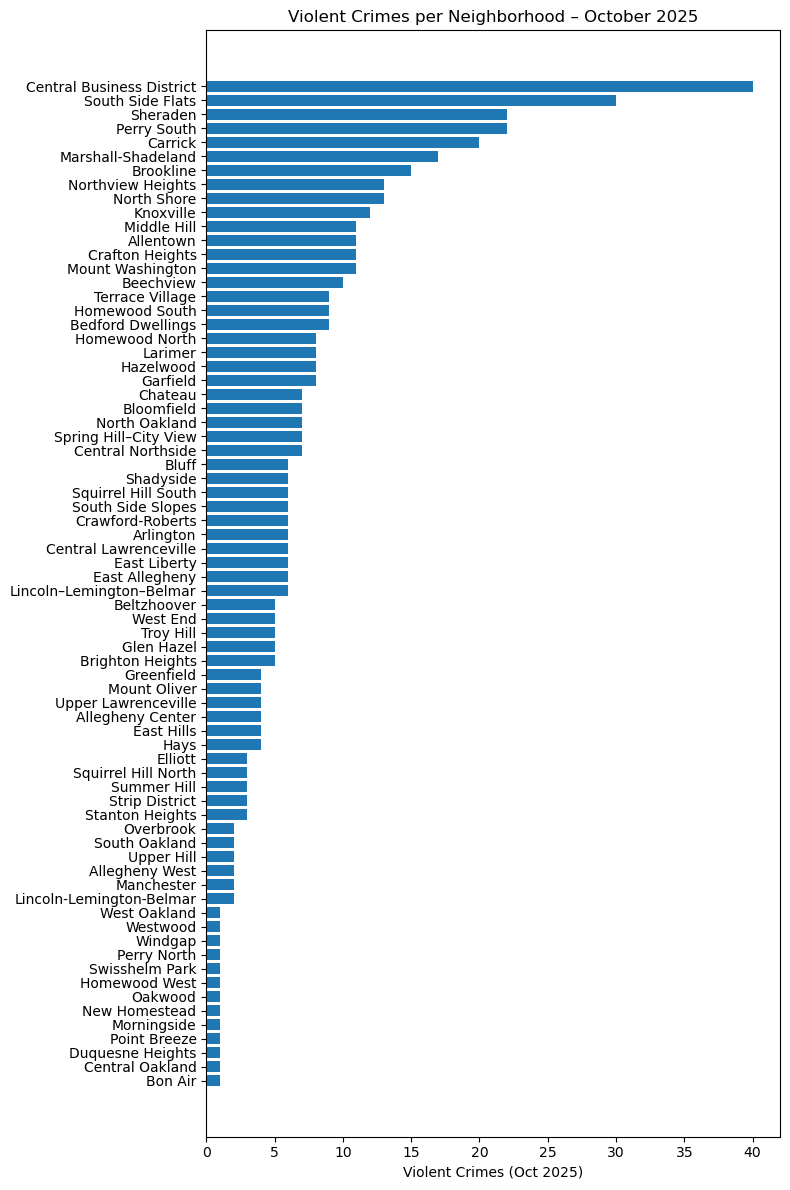

In [11]:
plt.figure(figsize=(8,12))
plt.barh(counts.index, counts.values)
plt.xlabel("Violent Crimes (Oct 2025)")
plt.title("Violent Crimes per Neighborhood – October 2025")
plt.tight_layout()

plt.show()

## The Best Neighborhood

After filtering the data, several neighborhoods tied as the safest, each reporting only one violent crime during the month. These include Bon Air, Windgap, Homewood West, Westwood, Morningside, New Homestead, and a few others. Meanwhile, areas like the Central Business District and South Side Flats had much higher counts. Based on this metric, Bon Air is tied for the safest neighborhoods in October 2025.

## Conclusion

Using violent crime as the measure of safety, multiple neighborhoods—including Bon Air—had extremely low levels of incidents. This provides an objective way to compare safety based on serious offenses, even if perceptions of safety may differ from person to person.

## Possible Limitations

Neighborhoods vary in population size, which can affect the number of reported crimes. A neighborhood with more people may naturally have more incidents, while a smaller neighborhood may appear safer simply because fewer people live there. Since this analysis uses raw counts, it does not measure crime rate per resident.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("bd41992a-987a-4cca-8798-fbe1cd946b07 (1).csv", low_memory=False)

df["ReportedDate"] = pd.to_datetime(df["ReportedDate"], errors='coerce')

# Counts all crimes per neighborhood (no filters)
all_counts = df.groupby("Neighborhood").size().sort_values()

all_counts

Neighborhood
Saint Clair                    25
Ridgemont                      33
Chartiers                      38
New Homestead                  54
Swisshelm Park                 66
                             ... 
East Allegheny               1917
Shadyside                    1993
Carrick                      2242
South Side Flats             4631
Central Business District    7218
Length: 91, dtype: int64

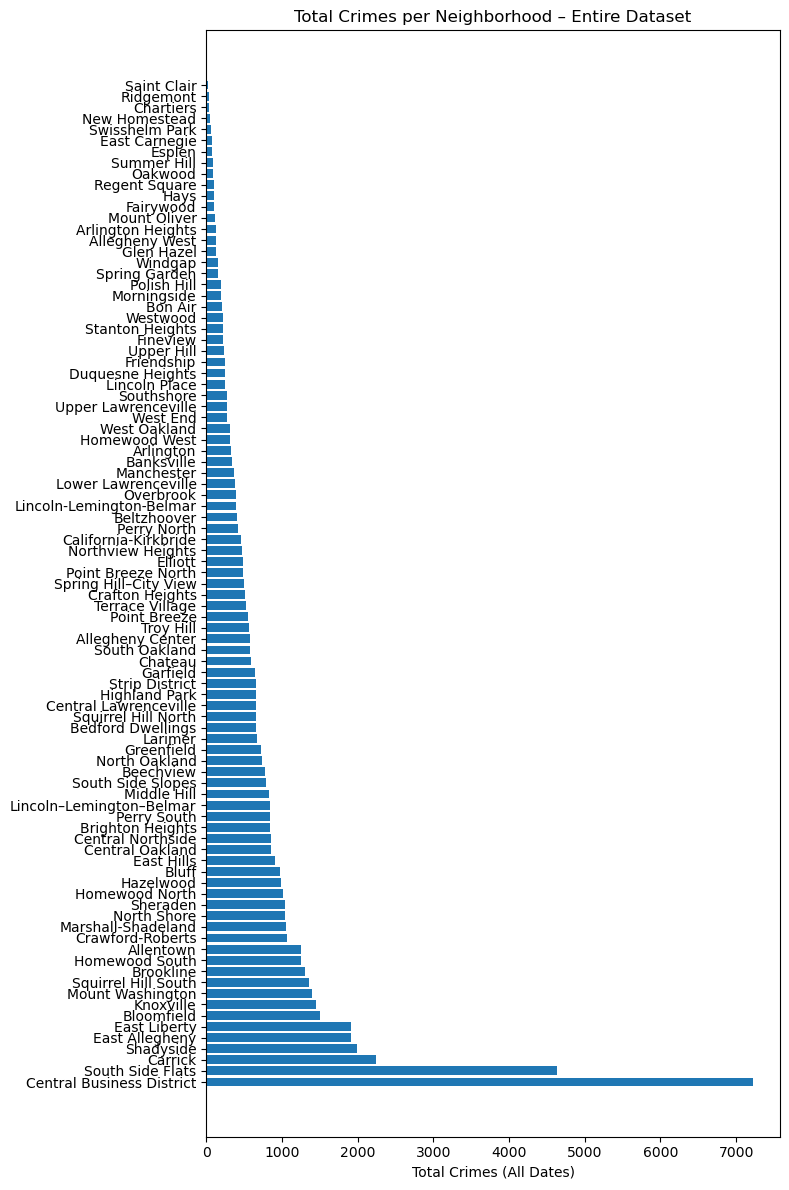

In [13]:
plt.figure(figsize=(8, 12))

plt.barh(all_counts.index, all_counts.values)

plt.xlabel("Total Crimes (All Dates)")
plt.title("Total Crimes per Neighborhood – Entire Dataset")

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("bd41992a-987a-4cca-8798-fbe1cd946b07 (1).csv", low_memory=False)

df["ReportedDate"] = pd.to_datetime(df["ReportedDate"], errors='coerce')

october_2025 = df[
    (df["ReportedDate"].dt.year == 2025) &
    (df["ReportedDate"].dt.month == 10)
]

grouped = october_2025.groupby("Neighborhood")

counts = grouped.size()

counts = counts.sort_values()

counts

Neighborhood
Arlington Heights              1
Fairywood                      1
Ridgemont                      1
Regent Square                  2
East Carnegie                  3
                            ... 
Bloomfield                    76
Shadyside                     79
Carrick                      103
South Side Flats             164
Central Business District    390
Length: 88, dtype: int64

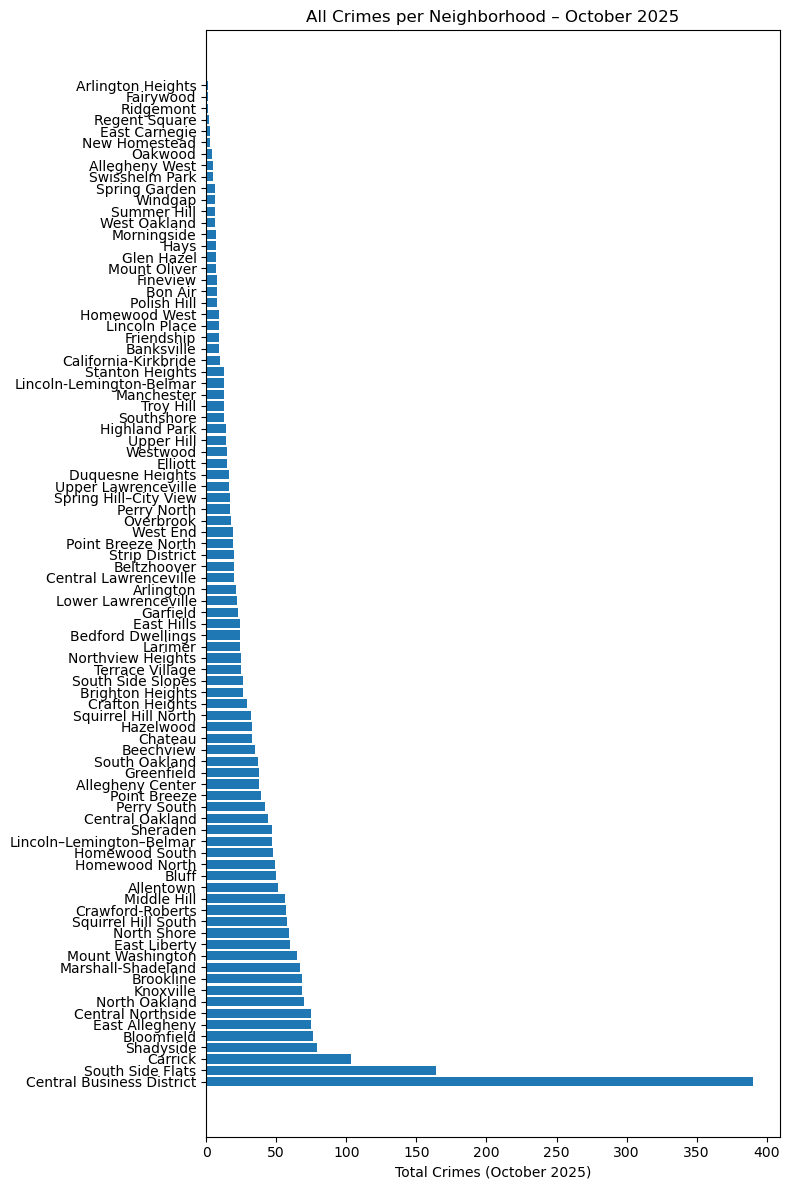

In [15]:
plt.figure(figsize=(8, 12))

plt.barh(counts.index, counts.values)

plt.xlabel("Total Crimes (October 2025)")
plt.title("All Crimes per Neighborhood – October 2025")

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("bd41992a-987a-4cca-8798-fbe1cd946b07 (1).csv", low_memory=False)

df["ReportedDate"] = pd.to_datetime(df["ReportedDate"], errors='coerce')

all_counts = df.groupby("Neighborhood").size().sort_values()

all_counts

Neighborhood
Saint Clair                    25
Ridgemont                      33
Chartiers                      38
New Homestead                  54
Swisshelm Park                 66
                             ... 
East Allegheny               1917
Shadyside                    1993
Carrick                      2242
South Side Flats             4631
Central Business District    7218
Length: 91, dtype: int64

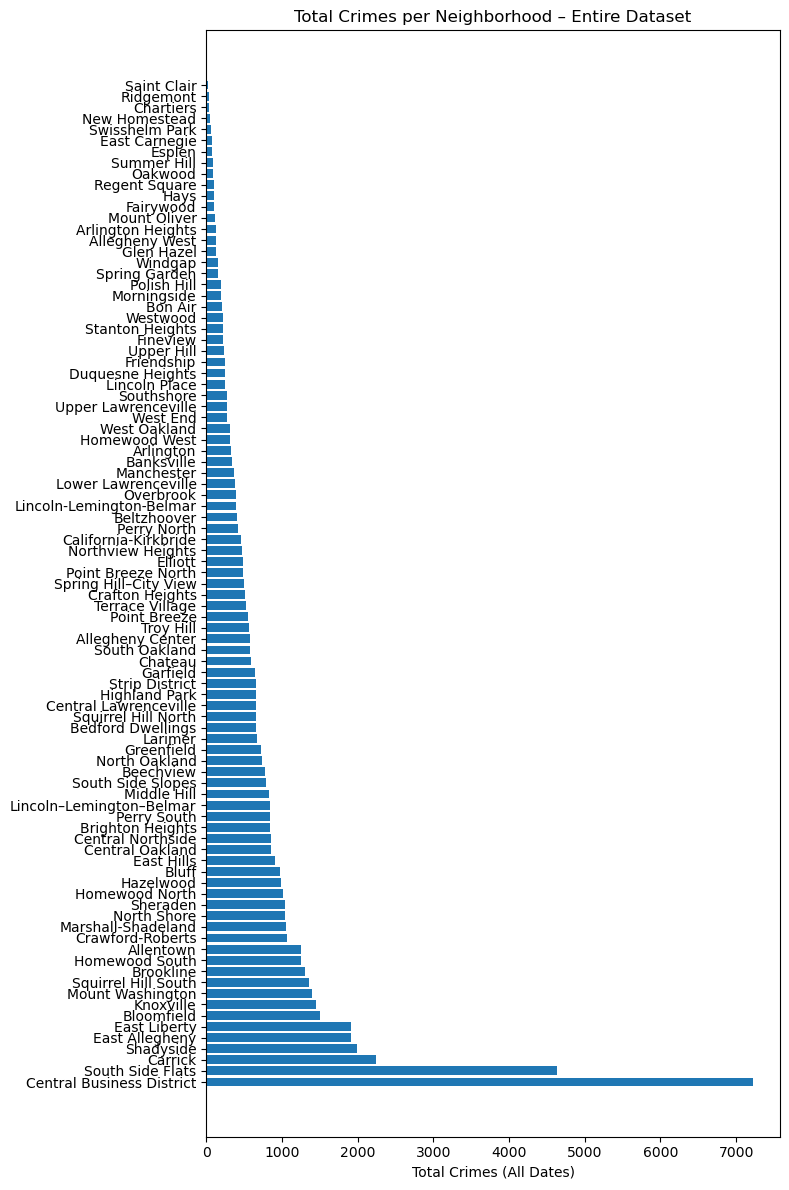

In [16]:
plt.figure(figsize=(8, 12))
plt.barh(all_counts.index, all_counts.values)
plt.xlabel("Total Crimes (All Dates)")
plt.title("Total Crimes per Neighborhood – Entire Dataset")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("bd41992a-987a-4cca-8798-fbe1cd946b07 (1).csv", low_memory=False)

df["ReportedDate"] = pd.to_datetime(df["ReportedDate"], errors='coerce')

violent_all = df[df["NIBRS_Crime_Against"] == "Person"]

violent_counts_all = violent_all.groupby("Neighborhood").size().sort_values()

violent_counts_all

Neighborhood
Ridgemont                      3
Regent Square                  5
Swisshelm Park                 7
Saint Clair                    7
Chartiers                      9
                            ... 
East Liberty                 291
Knoxville                    319
Carrick                      476
South Side Flats             534
Central Business District    981
Length: 91, dtype: int64

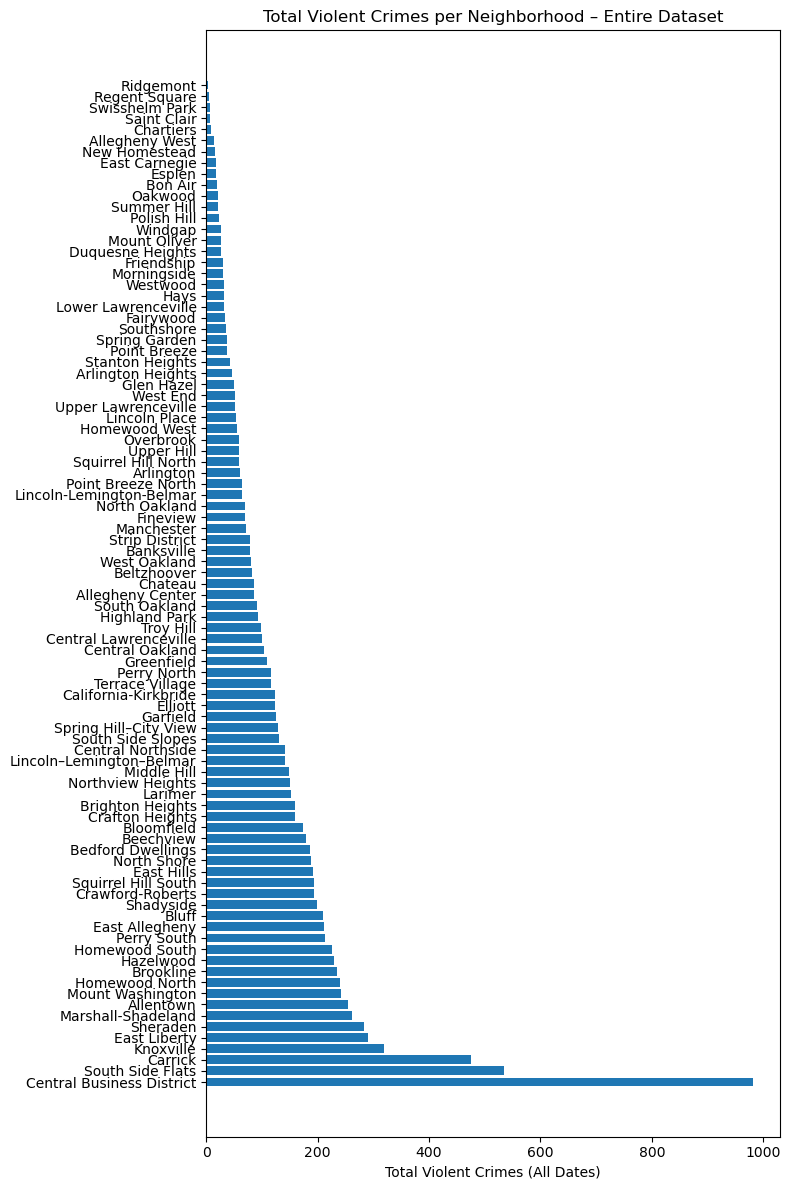

In [18]:
plt.figure(figsize=(8, 12))
plt.barh(violent_counts_all.index, violent_counts_all.values)
plt.xlabel("Total Violent Crimes (All Dates)")
plt.title("Total Violent Crimes per Neighborhood – Entire Dataset")
plt.tight_layout()
plt.gca().invert_yaxis() 
plt.show()

# Fire Incidents in City of Pittsburgh

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

fire = pd.read_csv("FireIncidentsPitt.tsv", sep = "\t")
df = fire[["neighborhood","type_description"]]

In [35]:
df = df.sort_values(by="neighborhood")
df = df.dropna(subset=["neighborhood"]) #get rid of values that do not have an associated neighborhood
df.head()

,neighborhood,type_description
3157,Allegheny Center,"Cooking fire, confined to container"
1364,Allegheny Center,Building fire
5117,Allegheny Center,"Cooking fire, confined to container"
2674,Allegheny Center,"Cooking fire, confined to container"
1921,Allegheny Center,"Cooking fire, confined to container"


In [39]:
counts = df["type_description"].value_counts() 
frequent_types = counts[counts > 50].index.tolist()

for type_description in frequent_types:
    total = counts[type_description]
    print(type_description, ":", total)
    subset = df[df["type_description"] == type_description] 

filtered_types = counts[counts > 100].index
filtered_df = df[df["type_description"].isin(filtered_types)]
sorted_counts = counts[counts > 50].sort_values()

Cooking fire, confined to container : 2004
Building fire : 1899
Passenger vehicle fire : 948
Outside rubbish, trash or waste fire : 747
Brush or brush-and-grass mixture fire : 542
Outside rubbish fire, Other : 534
Dumpster or other outside trash receptacle fire : 434
Trash or rubbish fire, contained : 407
Natural vegetation fire, Other : 256
Special outside fire, Other : 224
Mobile property (vehicle) fire, Other : 175
Fire, Other : 166
Fires in structure other than in a building : 143
Grass fire : 124
Outside equipment fire : 70
Fuel burner/boiler malfunction, fire confined : 57


<Figure size 1000x500 with 0 Axes>

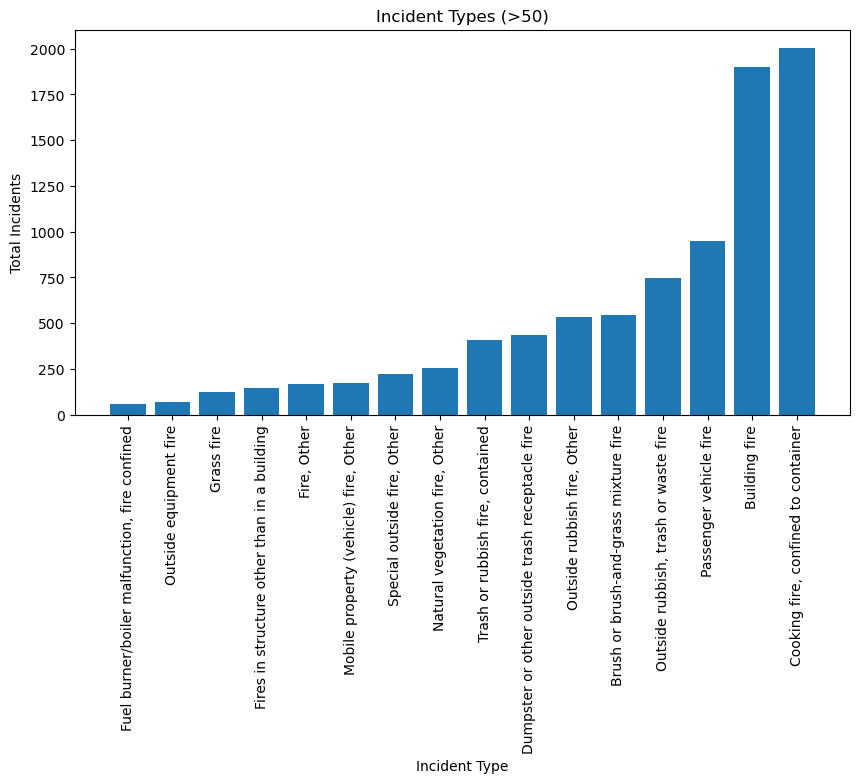

In [40]:
plt.figure(figsize=(10, 5))
plt.bar(sorted_counts.index, sorted_counts.values)
plt.xticks(rotation=90)   
plt.xlabel("Incident Type")
plt.ylabel("Total Incidents")
plt.title("Incident Types (>50)")
plt.show()

In [41]:
neighborhood_counts = filtered_df["neighborhood"].value_counts()
for neighborhood, count in neighborhood_counts.items():
    print(neighborhood, ":", count)

Carrick : 313
South Side Flats : 294
Central Business District : 279
Squirrel Hill South : 267
Hazelwood : 251
East Liberty : 225
Mount Washington : 222
Lincoln-Lemington-Belmar : 201
Brookline : 201
Homewood South : 199
Knoxville : 198
Shadyside : 195
Homewood North : 193
Bloomfield : 183
Sheraden : 174
Perry South : 167
East Hills : 160
Beechview : 158
Bluff : 155
Marshall-Shadeland : 154
Brighton Heights : 153
East Allegheny : 140
Central Northside : 137
Beltzhoover : 134
Squirrel Hill North : 134
Allentown : 132
North Oakland : 131
Greenfield : 125
Larimer : 123
Garfield : 119
Spring Hill-City View : 115
Crawford-Roberts : 112
Perry North : 110
South Side Slopes : 108
Middle Hill : 106
South Oakland : 99
Central Oakland : 96
Troy Hill : 87
Terrace Village : 87
Crafton Heights : 85
North Shore : 84
Highland Park : 83
Strip District : 77
Central Lawrenceville : 76
Manchester : 76
Point Breeze : 74
Elliott : 74
Lincoln Place : 70
Northview Heights : 65
West Oakland : 65
Homewood West 

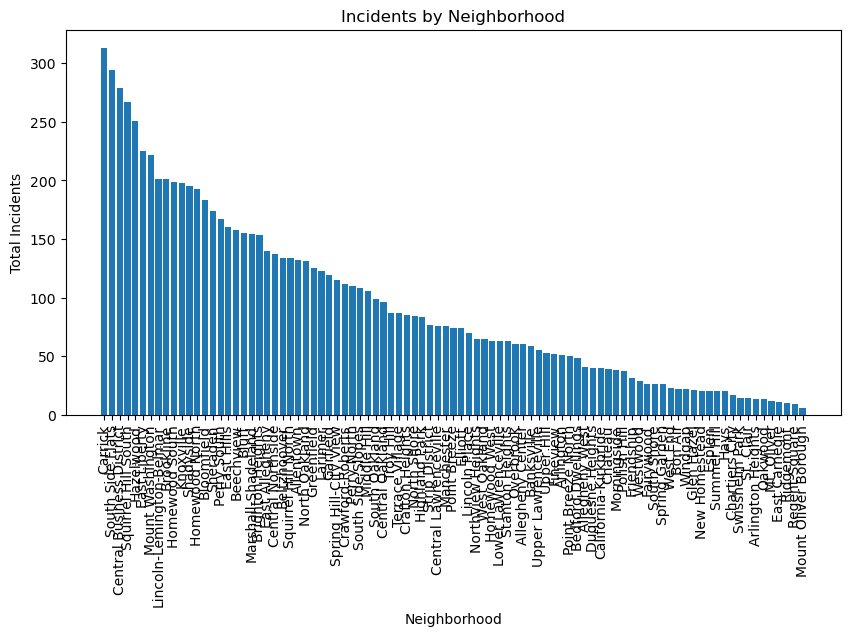

In [42]:
plt.figure(figsize=(10, 5))
plt.bar(neighborhood_counts.index, neighborhood_counts.values)
plt.xticks(rotation=90)   
plt.xlabel("Neighborhood")
plt.ylabel("Total Incidents")
plt.title("Incidents by Neighborhood")
plt.show()

# Top and Bottom 5

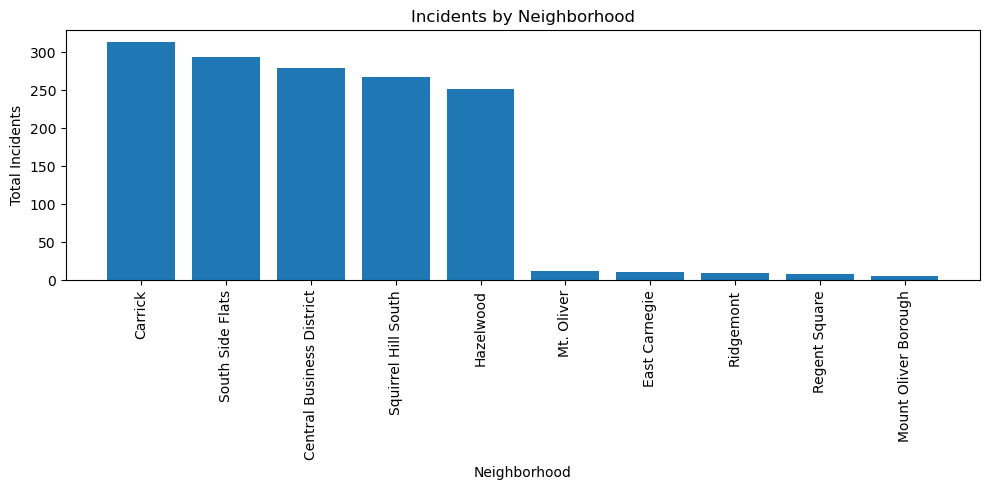

In [43]:
top5 = neighborhood_counts.head(5)
bottom5 = neighborhood_counts.tail(5)
combined = pd.concat([top5, bottom5])

plt.figure(figsize=(10, 5))
plt.bar(combined.index, combined.values)
plt.xticks(rotation=90)   
plt.xlabel("Neighborhood")
plt.ylabel("Total Incidents")
plt.title("Incidents by Neighborhood")
plt.tight_layout()
plt.show()

# Best (And Worst) Neighborhood

The top three best neighborhoods were the ones with the lowest score. In first goes to Mount Oliver Borough, with only 6 incidents total, followed by Regent Square with 9 and Ridgemont with 10. The best neighborhood according to the amount of Fire Incidents is Mount Oliver Borough.


# Property Tax Delinquency

This is a dataset that shows deliquency of city property tax in Pittsburgh. We can use this data to determine which neighborhoods have the most deliquency, and tie it together with our other metrics to determine the best neighborhood. We consider neighborhoods with more deliquency to be worse than those with less.

In [44]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Analyses: Best/Worst Neighborhoods

We can look at both the total amount of delinquency, as well as how many incidents each neighbhorhood has.

In [45]:
delinquency_pandas = pd.read_csv("tax-delinquency.csv")
delinquency_pandas.head()

# loading in dataset ^

# seperate into each neighborhood:
delinquency_pandas['neighborhood'].value_counts()

neighborhood
Lincoln-Lemington-Belmar    1155
Homewood North              1083
Perry South                  919
Carrick                      884
Marshall-Shadeland           876
                            ... 
Chateau                       15
South Shore                   12
Glen Hazel                     8
Allegheny Center               3
Arlington Heights              3
Name: count, Length: 91, dtype: int64

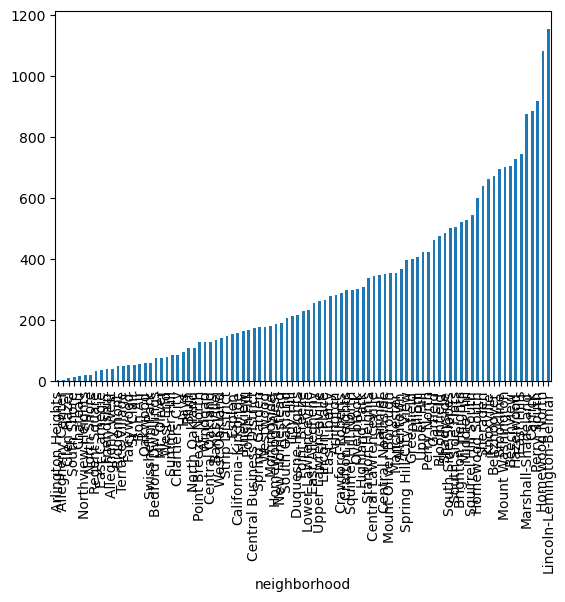

In [47]:
ds = pd.Series(delinquency_pandas['neighborhood'].value_counts())
ds = ds.sort_values(ascending=True)
ds.plot(kind = "bar")
plt.show()

But that's way too crowded, so let's just look at the 10 best and 10 worst neighborhoods in this category.

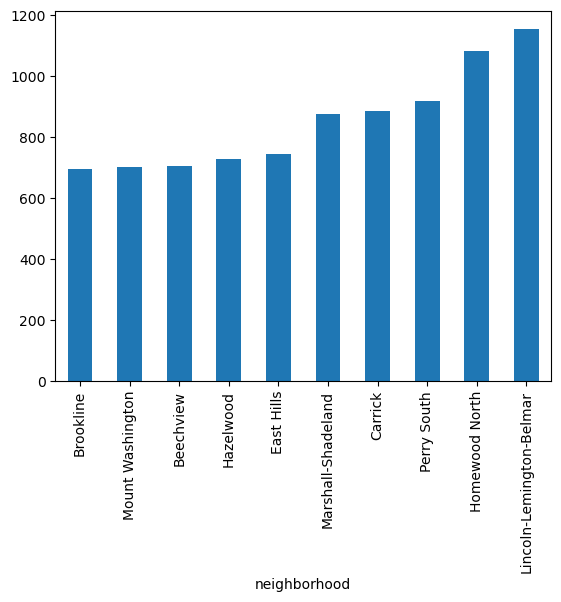

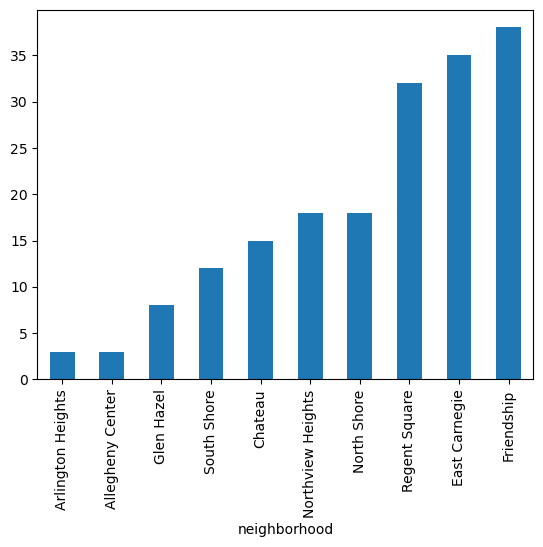

In [48]:
worst_ds = ds.tail(10)
best_ds = ds.head(10)

worst_ds.plot(kind = "bar")
plt.show()
best_ds.plot(kind = "bar")
plt.show()



So, the neighborhoods with the lowest number of properties which are delinquent on their taxes are Arlington Heights and Allegheny Center, and the ones with the highest number of properties delinquent on taxes are Homewood North and Lincoln-Lemington-Belmar.

Something else that may be important to note is that not every neighborhood has the same amount of properties, so one with a low amount of tax delinquent properties may just be a comparitively small neighborhood.

Now, we can look at how much each individual neighborhood is delinquent on their property taxes. After all, the few properties in the winning neighborhoods may be repeat offenders who have racked up large tax debts, and the losing neighborhoods may have just forgot to pay for the month.


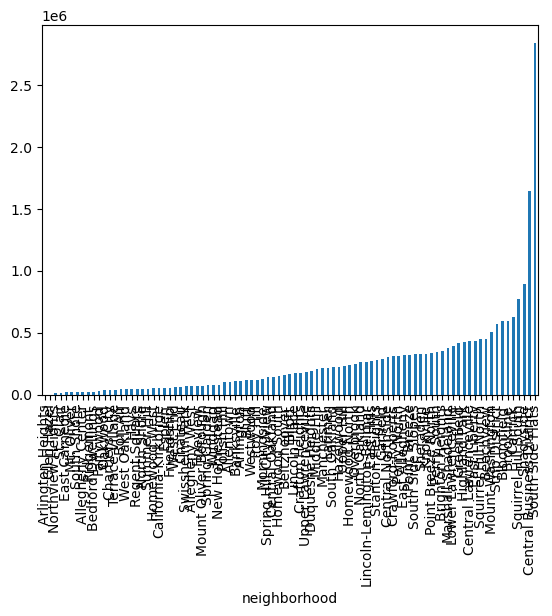

23015501.540000003


In [49]:
amt_delinquent = delinquency_pandas.groupby("neighborhood").sum()["current_delq_tax"]
amt_delq = amt_delinquent.sort_values(ascending = True)
amt_delq.plot(kind = 'bar')
plt.show()
print(amt_delq.sum())



Again we'll have to trim this chart to only look at the best and the worst of them all.

Fun Fact: The entire city of Pittsburgh is in $23,015,501.54 of property tax debt as of this month (Nov. 2025).


In [50]:
best_delq = amt_delq.head(10)
best_delq
worst_delq = amt_delq.tail(10)
best_delq

neighborhood
Arlington Heights      566.08
Glen Hazel            1530.79
Northview Heights    11327.36
St. Clair            13898.65
East Carnegie        17950.09
Mt. Oliver           18501.76
South Shore          20029.02
Allegheny Center     20787.76
Ridgemont            22605.73
Bedford Dwellings    26002.57
Name: current_delq_tax, dtype: float64

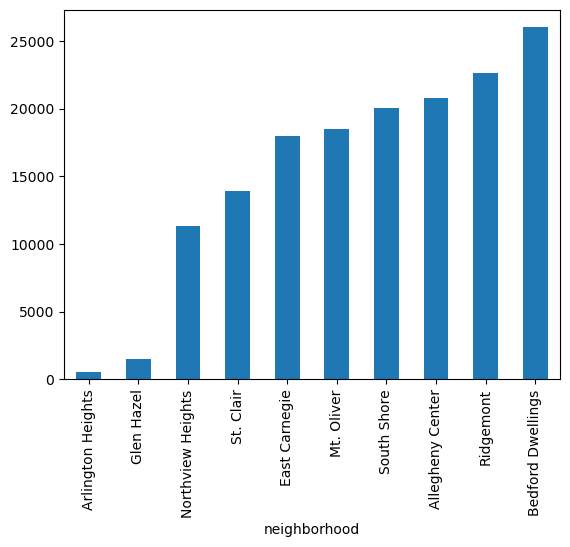

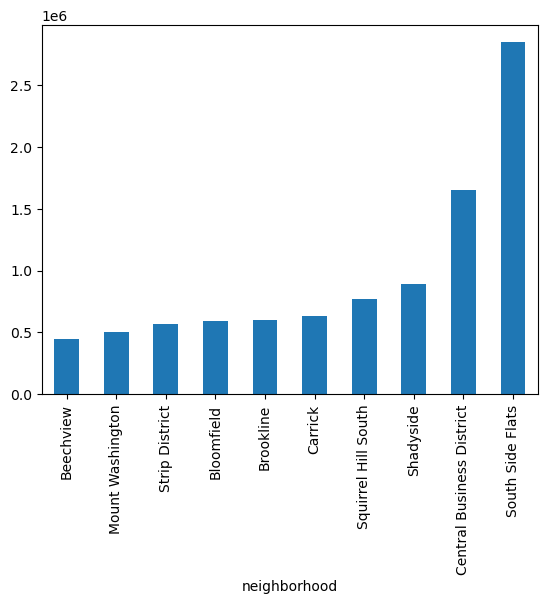

In [52]:
best_delq.plot(kind = "bar")
plt.show()

worst_delq.plot(kind = "bar")
plt.show()



The neighborhoods with the lowest quantity of tax delinquency are Arlington Heights with 566.08, and Glen Hazel with 1530.79. The neighborhood with the most delinquent tax by far is the South Side Flats, with over 2.5m.
Results of these metrics:

Based on both ways that we analyzed this dataset, it's pretty clear that Arlington Heights was the best neighborhood in this regard. Hopefully, this means that this neighborhood is the one that is the best at paying its taxes, and therefore contributes the most to the surrounding community, making it a contender for the best neighborhood of all time!


# **Group Conclusion**

Based on the metrics of crime safety, fire incidents, and property tax delinquency, we have concluded that St. Clair is the best overall neighborhood in Pittsburgh according to our analysis, as it s

## **Carlos' Conclusion**

I have lived in Pittsburgh my whole life so I can say St. Clair is a "good" neighborhood if we are talking in terms of safety, fire incidents, and property tax deliquency. Although we concluded that St. Clair is the best neighborhood, my personal favorite neighborhood is Highland Park. Highland Park is my favorite because that is where I grew up and I always get a nostalgic feeling when I walk around there. Highland park is also high scoring in all of our research, so we can also consider it a "good" neighborhood based on all the evidence .

## **Mason's Conclusion**

I live far enough away that I didn't come to Pittsburgh very often before I went to university, so I've never been to St. Clair. From what I can see online, it seems like a decent suburban place to live, but it's really small and there isn't much else there. My personal favorite neighborhoods are Lawrenceville and South Side Flats, which is interesting because neither one scored very well on our safety metrics. Lawrenceville has a lot of restaurants and other businesses that I like to go to in my free time. The South Side Flats definitely don't have as much to do as Lawrenceville, Downtown, or the Strip, but I like to go there to buy groceries since it's slightly closer to Pitt, and I've heard that they have really good housing prices compared to how urban of an area it is.

## **Mark's Conclusion**

Despite being relatively close to Pittsburgh from my house, I've never actually been inside the city much so I can't personally say whether or not Saint Clair is the best neighborhood or not, but it seems likely considering how low it scored on all three metrics. My favorite neighborhood personal is probably the Strip District, mostly because of the amount of shops and things to do there. It's always great for a fun afternoon, and I've gone there a few times since moving to Pittsburgh. 
